data:       symboling  normalized-losses         make fuel-type aspiration  \
0             3                122  alfa-romero       gas        std   
1             3                122  alfa-romero       gas        std   
2             1                122  alfa-romero       gas        std   
3             2                164         audi       gas        std   
4             2                164         audi       gas        std   
5             2                122         audi       gas        std   
6             1                158         audi       gas        std   
7             1                122         audi       gas        std   
8             1                158         audi       gas      turbo   
9             2                192          bmw       gas        std   
10            0                192          bmw       gas        std   
11            0                188          bmw       gas        std   
12            0                188          bmw       gas 

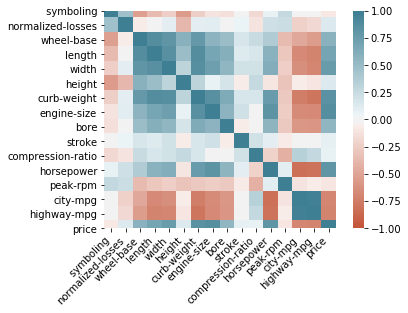

In [6]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

import pandas as pd
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')
print ("data:", data)
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

data:     GMA   EI  Con  EStab  Ext  Open  Agree  PerT  PerfJ  Gender 0=Female  \
0     2   79   58     77   28    25   44.0    30      5                1   
1     4   74   73     52   36    20   45.0    61      2                1   
2     8   88   71     67   75    55   18.0    74      6                0   
3     9   94   60     75   49     4   87.0    61      5                1   
4    10  106   43     76   52    27   50.0     5      8                1   
5    10   89   66     44   35    52   30.0    42      4                1   
6    10  101   52     67   53    56    8.6    26      6                1   
7    11   91   56     76   45    51   55.0    64      6                1   
8    11   51   67     36   55    47   53.0    93      6                1   
9    11  109   65     50   52    10    9.0    48      5                1   
10   12   71   53     49   55    25   25.0    31      4                1   
11   12  108   53     71   64    38   74.0    58      4                1   
12   1

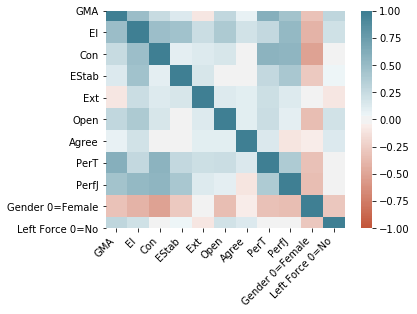

In [61]:
#Reference/Code: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./PoliceDataFull2021.csv')
print ("data:", data)
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



data[0]: Index(['GMA', 'EI', 'Con', 'EStab', 'Ext', 'Open', 'Agree', 'PerT', 'PerfJ',
       'Gender 0=Female', 'Left Force 0=No'],
      dtype='object')


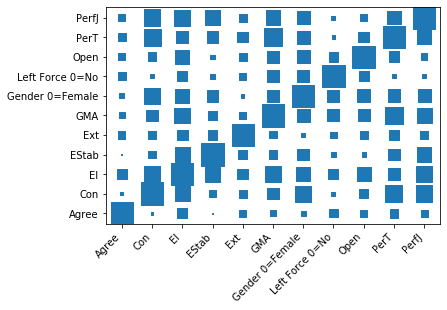

In [43]:
# Step 1 - Make a scatter plot with square markers, set column names as labels

def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
#data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')
data = pd.read_csv('./PoliceDataFull2021.csv')
#columns = ['GMA', 'EI', 'Con', 'EStab']
print ("data[0]:", data.columns)
columns = data.columns
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)


In [44]:
ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

In [45]:
ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])

NameError: name 'x_to_num' is not defined

data[0]: Index(['GMA', 'EI', 'Con', 'EStab', 'Ext', 'Open', 'Agree', 'PerT', 'PerfJ',
       'Gender 0=Female', 'Left Force 0=No'],
      dtype='object')
x: 0                  GMA
1                   EI
2                  Con
3                EStab
4                  Ext
5                 Open
6                Agree
7                 PerT
8                PerfJ
9      Gender 0=Female
10     Left Force 0=No
11                 GMA
12                  EI
13                 Con
14               EStab
15                 Ext
16                Open
17               Agree
18                PerT
19               PerfJ
20     Gender 0=Female
21     Left Force 0=No
22                 GMA
23                  EI
24                 Con
25               EStab
26                 Ext
27                Open
28               Agree
29                PerT
            ...       
91               EStab
92                 Ext
93                Open
94               Agree
95                PerT
96             

TypeError: ("unsupported operand type(s) for -: 'str' and 'int'", 'occurred at index x')

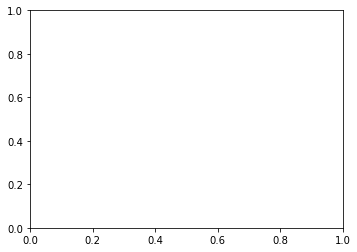

In [60]:
def heatmap(x, y, size, corr):

    n_colors = 256 # Use 256 colors for the diverging color palette
    palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
    color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation
    fig, ax = plt.subplots()
    
    def value_to_color(val):
        val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
        ind = int(val_position * (n_colors - 1)) # target index in the color palette
        return palette[ind]
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)}
    size_scale = 500

    
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot

    print ("x:", x)
    print ("y:", y)
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        #c=[i for i in range(n_colors)].map(value_to_color)
        #c=np.random.randint(1,5, size=n_colors),
        c=corr.apply(value_to_color),
        #c=np.ndarray(2,n_colors).map(value_to_color),
        #c=data.apply(value_to_color),
        #c=color.apply(value_to_color), # Vector of square colors, mapped to color palette
        #c = sns.color_palette().apply(value_to_color),
        #c=[-1,-0.5,0.5,1].apply(value_to_color), # Vector of square colors, mapped to color palette
        marker='s' # Use square as scatterplot marker
    )
# ...

# Add color legend on the right side of the plot
    ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

    col_x = [0]*len(palette) # Fixed x coordinate for the bars
    bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

    bar_height = bar_y[1] - bar_y[0]
    ax.barh(
        y=bar_y,
        width=[5]*len(palette), # Make bars 5 units wide
        left=col_x, # Make bars start at 0
        height=bar_height,
        color=palette,
        linewidth=0
    )
    ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
    ax.grid(False) # Hide grid
    ax.set_facecolor('white') # Make background white
    ax.set_xticks([]) # Remove horizontal ticks
    ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
    ax.yaxis.tick_right() # Show vertical ticks on the right
    
data = pd.read_csv('./PoliceDataFull2021.csv')
#columns = ['GMA', 'EI', 'Con', 'EStab']
print ("data[0]:", data.columns)
columns = data.columns
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs(),
    corr=corr
)